In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.validation import test_model
import numpy as np

(df, regul), history = test_model()

2018-03-24 21:52:33,725 root         INFO     Load data from SQL.
2018-03-24 21:52:34,022 root         INFO     Train Scaler Model
2018-03-24 21:52:34,314 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            161600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/80
18461/18461 [==============================] - 2s 95us/step - loss: 42.5245 - mean_squared_error: 0.0285 - mean_absolute_error: 0.1334 - val_loss: 40.5422 - val_mean_squared_error: 0.0033 - val_mean_absolute_error: 0.0540
Epoch 31/80
18461/18461 [==============================] - 2s 95us/step - loss: 40.5975 - mean_squared_error: 0.0203 - mean_absolute_error: 0.1093 - val_loss: 38.6716 - val_mean_squared_error: 0.0010 - val_mean_absolute_error: 0.0279
Epoch 32/80
18461/18461 [==============================] - 2s 95us/step - loss: 38.7293 - mean_squared_error: 0.0136 - mean_absolute_error: 0.0856 - val_loss: 36.8938 - val_mean_squared_error: 2.0261e-04 - val_mean_absolute_error: 0.0121
Epoch 33/80
18461/18461 [==============================] - 2s 96us/step - loss: 36.9460 - mean_squared_error: 0.0086 - mean_absolute_error: 0.0643 - val_loss: 35.2032 - val_mean_squared_error: 4.7454e-04 - val_mean_absolute_error: 0.0195
Epoch 34/80
18461/18461 [==============================]

Epoch 65/80
18461/18461 [==============================] - 2s 93us/step - loss: 6.7787 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0274 - val_loss: 6.3833 - val_mean_squared_error: 4.1627e-05 - val_mean_absolute_error: 0.0050
Epoch 66/80
18461/18461 [==============================] - 2s 92us/step - loss: 6.4043 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0260 - val_loss: 6.0307 - val_mean_squared_error: 3.3598e-05 - val_mean_absolute_error: 0.0043
Epoch 67/80
18461/18461 [==============================] - 2s 94us/step - loss: 6.0502 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0238 - val_loss: 5.6896 - val_mean_squared_error: 2.8293e-05 - val_mean_absolute_error: 0.0039
Epoch 68/80
18461/18461 [==============================] - 2s 94us/step - loss: 5.7084 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0226 - val_loss: 5.3725 - val_mean_squared_error: 2.5587e-05 - val_mean_absolute_error: 0.0035
Epoch 69/80
18461/18461 [==============================]

2018-03-24 21:54:59,436 root         INFO     Load data from SQL.
2018-03-24 21:54:59,626 root         INFO     Test set of 7912 items !
2018-03-24 21:55:28,568 root         INFO     Done !


In [2]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error

print("evs: %f" % explained_variance_score(df['real'], df['predicted']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted']))

print("evs: %f" % explained_variance_score(df['real'], df['predicted_regul']))
print("mae: %f" % mean_absolute_error(df['real'], df['predicted_regul']))
print("msr: %f" % mean_squared_error(df['real'], df['predicted_regul']))
print("mdae: %f" % median_absolute_error(df['real'], df['predicted_regul']))

evs: 0.998566
mae: 3.675161
msr: 58.959011
mdae: 1.140000
evs: 0.998566
mae: 3.582678
msr: 58.915565
mdae: 0.800000


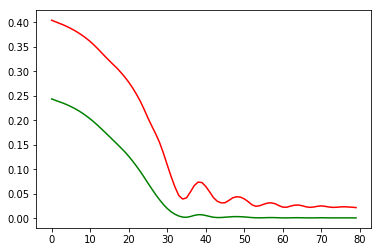

In [3]:
plt.plot(history.history['mean_absolute_error'], 'r'),
plt.plot(history.history['mean_squared_error'], 'g')

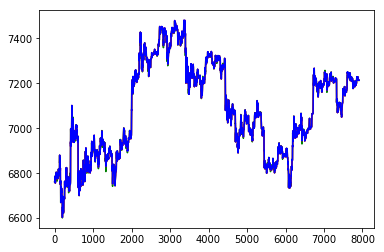

In [8]:
plt.plot(df['real'], 'g')
plt.plot(df['predicted'], 'r')
plt.plot(df['predicted_regul'], 'b')

In [5]:
df.describe()

,real,predicted,diff,predicted_regul,diff_regul
count,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000
mean,7079.864082,7079.540972,0.323110,7080.110972,-0.246890
std,202.612229,203.194610,7.672161,203.194610,7.672161
min,6600.990000,6603.190000,-71.820000,6603.760000,-72.390000
25%,6905.905000,6904.405000,-0.720000,6904.975000,-1.290000
50%,7064.575000,7063.475000,0.570000,7064.045000,0.000000
75%,7241.047500,7240.990000,1.190000,7241.560000,0.620000
max,7477.500000,7479.870000,85.810000,7480.440000,85.240000


In [6]:
regul

0.569999999999709